In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# 設定 seaborn 主題，這會影響圖表的風格和顏色
sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline
# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats
from pytorch_lightning.callbacks import EarlyStopping, Callback, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# 使用pandas讀取CSV文件
df = pd.read_csv('https://raw.githubusercontent.com/xc90529/noninvasive_data_visualization/main/noninvasive_data.csv')

# To display the top 5 rows
df.head(5)
#CO-心輸出量
#CI - 心輸出指數
#SV - 舒張容積
#SVI - 舒張容積指數
#SVV - 舒張容積變異度
#SVR - 舒張容積阻力
#SVRI - 舒張容積指數阻力
#PR - 脈搏率
#SYS - 收縮壓
#DIA - 舒張壓
#MAP - 平均動脈壓

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333


In [3]:
# Calculating the Shock Index as PR / SYS
df['PR/SYS'] = df['PR'] / df['SYS']

# Displaying the first few rows of the dataframe to confirm the new variable
df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000,0.801724
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333,0.779661
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667,0.760331
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000,0.745763
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333,1.000000


In [4]:
# Remove the 'ID' column and the 'si1m' column from your DataFrame
columns_to_check = df.drop(columns=['ID', 'si1m', ])

# Use the duplicated method to find duplicate rows
duplicate_rows = df[df.duplicated(subset=columns_to_check, keep=False)]

# Print the content of duplicate rows
print("Duplicate rows:")
print(duplicate_rows)
# 要排除的列名
columns_to_exclude = ['ID', 'si1m']

# 选择除了要排除的列以外的其他列
columns_to_check = df.columns[~df.columns.isin(columns_to_exclude)]

# 使用 selected_columns 作为子集来检查重复行，保留第一个重复行
duplicate_rows_df = df[df.duplicated(subset=columns_to_check, keep='first')]

# 打印重复行的数量
print("重复行的数量：", duplicate_rows_df.shape[0])

# 打印重复行的内容
print("重复行：")
print(duplicate_rows_df)
# 重置索引
df.reset_index(drop=True, inplace=True)

# 在原始数据框 df 中删除重复行
df = df.drop(duplicate_rows_df.index)

# 现在 df 中已经不包含重复行
print(df)

Duplicate rows:
      si1m   CO        CI  SV        SVI  SVV     SVR         SVRI   PR  SYS  \
17619    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17620    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17621    Y  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17622    N  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17623    Y  2.8  1.772152  45  28.481013   18  1878.0  1188.607595   62  101   
...    ...  ...       ...  ..        ...  ...     ...          ...  ...  ...   
35911    N  3.1  2.300000  27  20.000000   16  2038.0  2790.000000  116  101   
35912    Y  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35913    N  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35914    Y  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   
35915    N  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   

       DIA  MAP    ID  

In [5]:
# 四舍五入 df 中的所有数值列到小数点后第五位
rounded_df = df.round(5)

rounded_df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.00000,0.80172
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.33333,0.77966
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.66667,0.76033
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.00000,0.74576
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.33333,1.00000


相關係數分析

In [6]:
# 将 'si1m' 列中的 'Y' 转换为 1，'N' 转换为 0
rounded_df['si1m'] = rounded_df['si1m'].apply(lambda x: 1 if x == 'Y' else 0)

# 计算除 'ID' 列外的所有列的 Pearson 相关系数
correlation_matrix = rounded_df.drop('ID', axis=1).corr()

# 打印与 'si1m' 相关的相关系数
print(correlation_matrix['si1m'])


si1m      1.000000
CO        0.033251
CI        0.034217
SV       -0.297894
SVI      -0.336060
SVV       0.090539
SVR      -0.122073
SVRI     -0.053453
PR        0.551291
SYS      -0.400070
DIA      -0.045034
MAP      -0.254025
time     -0.052093
PR/SYS    0.648060
Name: si1m, dtype: float64


In [7]:
# 查看 'PR/SYS' 列的最大值和最小值
pr_sys_max = rounded_df['PR/SYS'].max()
pr_sys_min = rounded_df['PR/SYS'].min()

pr_sys_max, pr_sys_min


(2.76786, 0.10563)

In [8]:
# 查看 si1m 變相的數量
si1m_counts = rounded_df["si1m"].value_counts()

# 顯示 0 和 1 的數量
print(si1m_counts)

si1m
0    30482
1     8555
Name: count, dtype: int64


In [9]:
 # 進行特徵選取
selected_features_df = rounded_df[['si1m', 'CO', 'CI' ,'SV', 'SVI', 'SVV', 'SVR', 'SVRI','PR', 'SYS', 'DIA', 'MAP',  'PR/SYS',  'time']]

lstm模型預處理

In [10]:
class LossLoggingCallback(Callback):
    def __init__(self):
        super().__init__()
        self.val_losses = []  # To store validation losses
        self.train_losses = []  # To store training losses

    def on_validation_epoch_end(self, trainer, pl_module):
        val_loss = trainer.callback_metrics["val_loss"].item()
        self.val_losses.append(val_loss)
        print(f"Epoch {trainer.current_epoch}: val_loss={val_loss}")

    def on_train_epoch_end(self, trainer, pl_module, unused=None):  # unused parameter for compatibility
        # Assuming you have a metric named "train_loss" logged
        if "train_loss" in trainer.callback_metrics:
            train_loss = trainer.callback_metrics["train_loss"].item()
            self.train_losses.append(train_loss)
            print(f"Epoch {trainer.current_epoch}: train_loss={train_loss}")

In [11]:
# 参数化测试集和验证集占总数据的比例
test_ratio = 0.15
val_ratio = 0.15  # 假设验证集从原始训练数据中分割出的比例

# 计算测试集和验证集的大小
total_size = len(selected_features_df)
test_size = int(total_size * test_ratio)  # 计算测试集大小
val_size = int(total_size * val_ratio)  # 直接根据总数据量计算验证集大小

# 分割索引
test_start = total_size - test_size
val_start = test_start - val_size  # 从测试集前开始分割出验证集

# 分割DataFrame为训练集、验证集和测试集
train_df = selected_features_df.iloc[:val_start]
val_df = selected_features_df.iloc[val_start:test_start]
test_df = selected_features_df.iloc[test_start:]

# 检查分割结果
print(f"训练集大小：{len(train_df)}")
print(f"验证集大小：{len(val_df)}")
print(f"测试集大小：{len(test_df)}")


训练集大小：27327
验证集大小：5855
测试集大小：5855


In [12]:
# si1m 是目标变量的列名
# 提取特征和目标变量
X_train = train_df.drop('si1m', axis=1)
y_train = train_df['si1m']

X_val = val_df.drop('si1m', axis=1)
y_val = val_df['si1m']

X_test = test_df.drop('si1m', axis=1)
y_test = test_df['si1m']



In [13]:
from sklearn.preprocessing import MinMaxScaler

# 使用MinMaxScaler进行缩放
scale = MinMaxScaler()
columns = train_df.columns

df_train_scaled = train_df.copy()
df_test_scaled = test_df.copy()
df_val_scaled = val_df.copy()
# 對訓練集的數值列进行擬合和转换，用相同的scaler避免数据泄露
df_train_scaled[columns] = scale.fit_transform(train_df[columns])
# 使用相同的scaler参数来转换测试集和驗證集的数值列
df_test_scaled[columns] = scale.transform(test_df[columns])
df_val_scaled[columns] = scale.transform(val_df[columns])




In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# 特征选择
X_train_df = df_train_scaled.drop('si1m', axis=1)  # 使用缩放后的数据
y_train = df_train_scaled['si1m'].values

selector = SelectKBest(f_classif, k=7)  # 选择最重要的7个特征
selector.fit(X_train_df, y_train)

selected_features = X_train_df.columns[selector.get_support()]  # 获取被选择的特征名称
X_train_selected = selector.transform(X_train_df)  # 转换X_train

# 列印被选中的特征名称
print("Selected features:", selected_features)

# 对验证集和测试集应用相同的特征选择
X_val_df = df_val_scaled.drop('si1m', axis=1)
y_val = df_val_scaled['si1m'].values
X_test_df = df_test_scaled.drop('si1m', axis=1)
y_test = df_test_scaled['si1m'].values


X_val_selected = selector.transform(X_val_df)
X_test_selected = selector.transform(X_test_df)

# 将DataFrame转换为NumPy数组，以便进行后续的模型训练和评估
X_train = X_train_selected
X_val = X_val_selected
X_test = X_test_selected


Selected features: Index(['SV', 'SVI', 'PR', 'SYS', 'DIA', 'MAP', 'PR/SYS'], dtype='object')


In [15]:
# 初始化空列表来构建时间序列窗口
X_train_ts = []
y_train_ts = []

# 定义历史数据长度和预测长度
n_future = 1
n_past = 30

# 注意：这里的X_train应该是已经过特征选择和转换后的数据，假设其已经是np.array格式
for i in range(n_past, len(X_train) - n_future + 1):
    # 添加从i-n_past到i的数据，这里假设X_train是特征选择和转换后的二维数组
    X_train_ts.append(X_train[i - n_past:i, :])  # 获取所有特征
    y_train_ts.append(y_train[i + n_future - 1])  # 获取未来第一个点作为输出

# 将列表转换为NumPy数组
X_train_ts = np.array(X_train_ts)
y_train_ts = np.array(y_train_ts)


In [16]:
print(X_train_ts.shape)
print(y_train_ts.shape)


(27297, 30, 7)
(27297,)


In [17]:
X_val_ts = []
y_val_ts = []

for i in range(n_past, len(X_val) - n_future + 1):
    X_val_ts.append(X_val[i - n_past:i, :])  
    y_val_ts.append(y_val[i + n_future - 1]) 
    
# 将列表转换为NumPy数组
X_val_ts = np.array(X_val_ts)
y_val_ts= np.array(y_val_ts)


In [18]:
X_test_ts = []
y_test_ts = []
for i in range(n_past, len(X_test) - n_future + 1):
    X_test_ts.append(X_test[i - n_past:i, :])  
    y_test_ts.append(y_test[i + n_future - 1]) 
    
# 将列表转换为NumPy数组
X_test_ts = np.array(X_test_ts)
y_test_ts= np.array(y_test_ts)

In [19]:
print('train data'.center(64, '-'))
print(X_train_ts.shape)
print(y_train_ts.shape)
print('validation data'.center(64, '-'))
print(X_val_ts.shape)
print(y_val_ts.shape)
print('test data'.center(64, '-'))
print(X_test_ts.shape)
print(y_test_ts.shape)

---------------------------train data---------------------------
(27297, 30, 7)
(27297,)
------------------------validation data-------------------------
(5825, 30, 7)
(5825,)
---------------------------test data----------------------------
(5825, 30, 7)
(5825,)


lstm模型建立


In [20]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
def multiClassModel(n_features, n_classes=2):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam')
    model.summary()
    return model

/Users/apple/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30)             │         4,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,622 (18.05 KB)

 Trainable params: 4,622 (18.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3600 - val_loss: 0.0564
Epoch 2/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2673 - val_loss: 0.0600
Epoch 3/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2695 - val_loss: 0.0509
Epoch 4/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2719 - val_loss: 0.0566
Epoch 5/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2626 - val_loss: 0.0565
Epoch 6/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2589 - val_loss: 0.0511
Epoch 7/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2485 - val_loss: 0.0582
Epoch 8/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2552 - val_loss: 0.0532
Epoch 9/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2520 - val_loss: 0.0587
Epoch 10/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2480 - val_loss: 0.0550
Epoch 11/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2456 - val_loss: 0.0550
Epoch 12/30
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

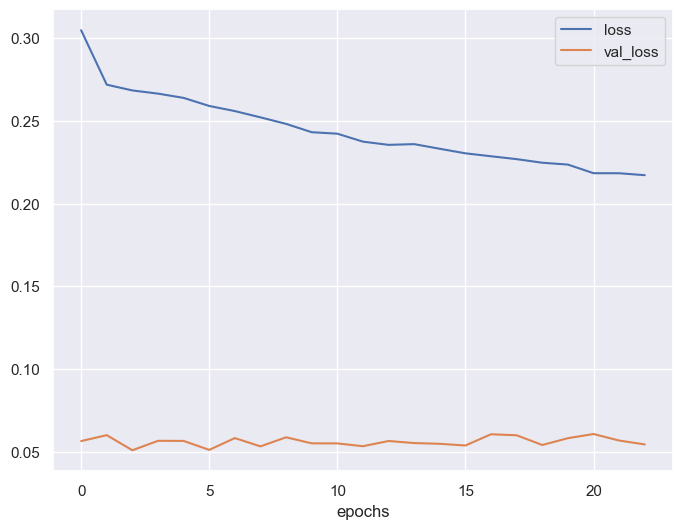

In [21]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

# 清理Keras后台会话
backend.clear_session()

# 假设 X_train_ts 已经被定义
n_features = X_train_ts.shape[2]  # 获取特征数

# 构建模型的函数
def multiClassModel(n_features, n_classes=2):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam')
    model.summary()
    return model

# 定义早停机制
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)

# 实例化模型
model = multiClassModel(n_features, n_classes=2)  # 确保 n_classes 设置正确

# 开始训练模型
history = model.fit(
    X_train_ts, y_train_ts,
    epochs=30,
    batch_size=64,
    validation_data=(X_val_ts, y_val_ts),
    callbacks=[callback]
)

# 可视化训练历史
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))
plt.show()


In [22]:
# 预测测试集 X_train_ts 為测试数据
y_pred_proba = model.predict(X_train_ts)
# 选择概率最高的类别作为预测结果
y_pred = np.argmax(y_pred_proba, axis=1)
  # 将概率大于0.5的视为类别1，否则为类别0

from sklearn.metrics import confusion_matrix
import numpy as np

# 计算每个类别的数量
unique, counts = np.unique(y_pred, return_counts=True)
class_counts = dict(zip(unique, counts))

# 打印输出
print("y_train (Class 0):", class_counts.get(0, 0))  # 获取类别0的数量，如果没有则返回0
print("y_train (Class 1):", class_counts.get(1, 0))   # 获取类别1的数量，如果没有则返回0



854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
y_train (Class 0): 23498
y_train (Class 1): 3799


In [23]:
# 预测测试集，假设 X_val_ts 是您的测试数据
y_pred_proba = model.predict(X_val_ts)
# 选择概率最高的类别作为预测结果
y_pred = np.argmax(y_pred_proba, axis=1)
  # 将概率大于0.5的视为类别1，否则为类别0

from sklearn.metrics import confusion_matrix
import numpy as np

# 计算每个类别的数量
unique, counts = np.unique(y_pred, return_counts=True)
class_counts = dict(zip(unique, counts))

# 打印输出
print("y_val (Class 0):", class_counts.get(0, 0))  # 获取类别0的数量，如果没有则返回0
print("y_val (Class 1):", class_counts.get(1, 0))   # 获取类别1的数量，如果没有则返回0



183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
y_val (Class 0): 5825
y_val (Class 1): 0


In [24]:
# 预测测试集，X_test_ts 是您的测试数据
y_pred_proba = model.predict(X_test_ts)
# 选择概率最高的类别作为预测结果
y_pred = np.argmax(y_pred_proba, axis=1)
  # 将概率大于0.5的视为类别1，否则为类别0

from sklearn.metrics import confusion_matrix
import numpy as np

# 计算每个类别的数量
unique, counts = np.unique(y_pred, return_counts=True)
class_counts = dict(zip(unique, counts))

# 打印输出
print("y_test (Class 0):", class_counts.get(0, 0))  # 获取类别0的数量，如果没有则返回0
print("y_test (Class 1):", class_counts.get(1, 0))   # 获取类别1的数量，如果没有则返回0



183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
y_test (Class 0): 3783
y_test (Class 1): 2042


In [25]:
# predicting on training set
y_train_pred_prob = model.predict(X_train_ts)
y_test_pred_prob = model.predict(X_test_ts)
y_val_pred_prob = model.predict(X_val_ts)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

854/854 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


In [26]:
from sklearn.metrics import accuracy_score
# 计算训练集和测试集的准确率
train_accuracy = accuracy_score(y_train_ts, y_train_pred)
test_accuracy = accuracy_score(y_test_ts, y_test_pred)
val_accuracy = accuracy_score(y_val_ts, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("val Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)
###32epoch:78% test_accuracy,36epoch:71%test_accuracy,23epoch:75% test_accuracy###


Training Accuracy: 0.8874601604571931
val Accuracy: 0.9902145922746781
Testing Accuracy: 0.7551931330472103
